
Data source:

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

Time period:

1985 - 2016 (31 years)

In [2]:
import pandas as pd
import os
import nltk
import nltk.corpus
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.plotly as py

In [3]:
csv = '/Users/nonoumasy/Downloads/data/suicide.csv'
df = pd.read_csv(csv)

In [12]:
#remove non-relevant columns
df = df.drop(['HDI for year', ], axis=1)

In [255]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [306]:
df.groupby('suicides/100k pop').country.max().sort_index(ascending=False)

suicides/100k pop
224.97                           Aruba
204.92                      Seychelles
187.06                        Suriname
185.37               Republic of Korea
182.32               Republic of Korea
177.61                         Hungary
177.57                         Hungary
176.91                         Hungary
176.33               Republic of Korea
176.26                         Hungary
173.86               Republic of Korea
172.86               Republic of Korea
172.80               Republic of Korea
170.86               Republic of Korea
165.96                         Hungary
162.67                         Hungary
161.92                         Hungary
157.48    Saint Vincent and Grenadines
154.92               Republic of Korea
154.63               Republic of Korea
152.45               Republic of Korea
151.33                       Lithuania
150.00                        Suriname
147.59               Republic of Korea
144.85                       Lithuania
144.71 

(0, 300)

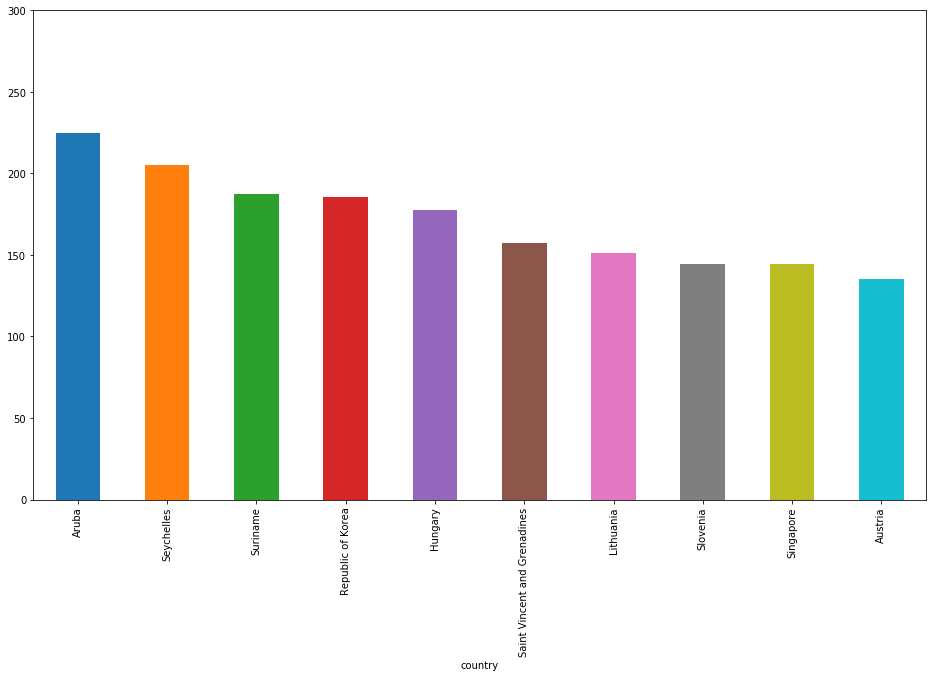

In [318]:
#suicides grouped by country per 100k population 
df.groupby('country')['suicides/100k pop'].max().sort_values(ascending=False)[0:10]
df.groupby('country')['suicides/100k pop'].max().sort_values(ascending=False)[0:10].plot(kind='bar', figsize=(16,9))
plt.ylim(0,300)

In [291]:
df.groupby(['country']).suicides_no.max

country
Albania                            39
Antigua and Barbuda                 2
Argentina                         745
Armenia                            32
Aruba                               4
Australia                         944
Austria                           515
Azerbaijan                         79
Bahamas                             5
Bahrain                            21
Barbados                            7
Belarus                          1391
Belgium                           686
Belize                              9
Bosnia and Herzegovina             96
Brazil                           3238
Bulgaria                          376
Cabo Verde                         18
Canada                           1442
Chile                             616
Colombia                          629
Costa Rica                        123
Croatia                           274
Cuba                              495
Cyprus                             16
Czech Republic                    623
Denm

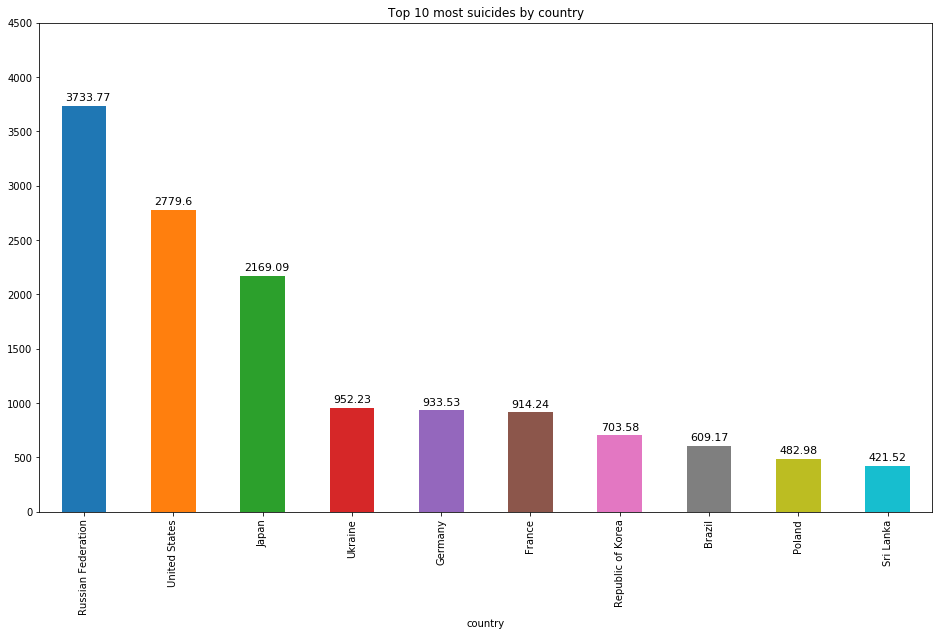

In [199]:
#top 10 most suicides by country(bar chart)

ax = df.groupby('country').suicides_no.mean().sort_values(ascending=False)[0:10].plot(kind='bar', figsize=(16,9),)
plt.title('Top 10 most suicides by country')
plt.ylim(0,4500)

for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+50, \
            str(round((i.get_height()), 2)), fontsize=11,
                rotation=0)
    


In [35]:
#top 10 least suicides by country
df.groupby('country').suicides_no.mean().sort_values(ascending=True)[0:10]

country
Saint Kitts and Nevis           0.000000
Dominica                        0.000000
Antigua and Barbuda             0.033951
San Marino                      0.111111
Grenada                         0.122581
Maldives                        0.166667
Bahamas                         0.336957
Kiribati                        0.401515
Saint Vincent and Grenadines    0.413333
Seychelles                      0.453704
Name: suicides_no, dtype: float64

In [278]:
df.groupby(['country','sex']).suicides_no.max()

country                 sex   
Albania                 female       32
                        male         39
Antigua and Barbuda     female        1
                        male          2
Argentina               female      233
                        male        745
Armenia                 female       18
                        male         32
Aruba                   female        2
                        male          4
Australia               female      294
                        male        944
Austria                 female      230
                        male        515
Azerbaijan              female       23
                        male         79
Bahamas                 female        2
                        male          5
Bahrain                 female        5
                        male         21
Barbados                female        3
                        male          7
Belarus                 female      227
                        male       1391
Belgium  

(0, 15000)

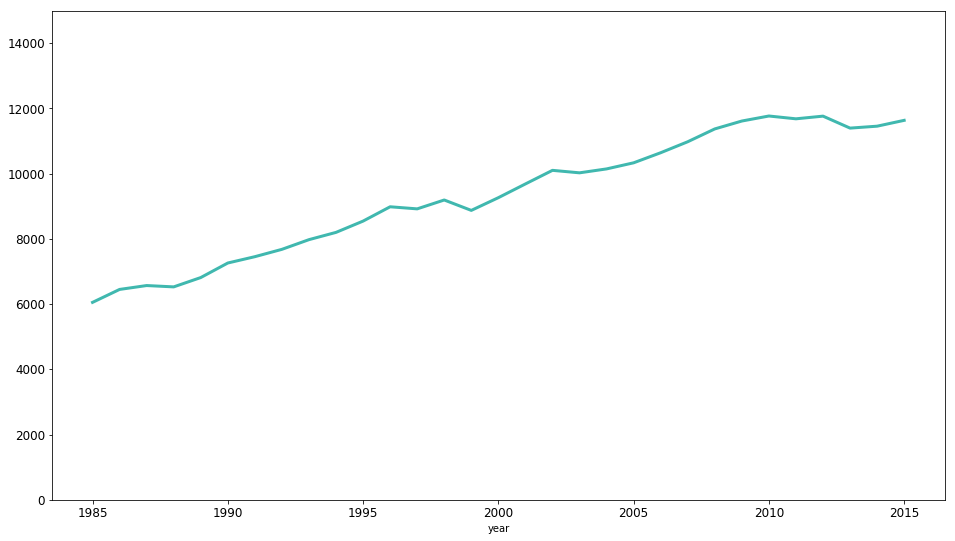

In [254]:
#Suicide data for Filtered Country 
df[df['country'] == 'United States' ].groupby(['year',]).suicides_no.max().plot(figsize=(16,9),
                  color=['#40B8AF'], fontsize=12, linewidth=3)
plt.ylim(0,15000)

Text(0.5, 1.0, 'Average Global Suicides by Year')

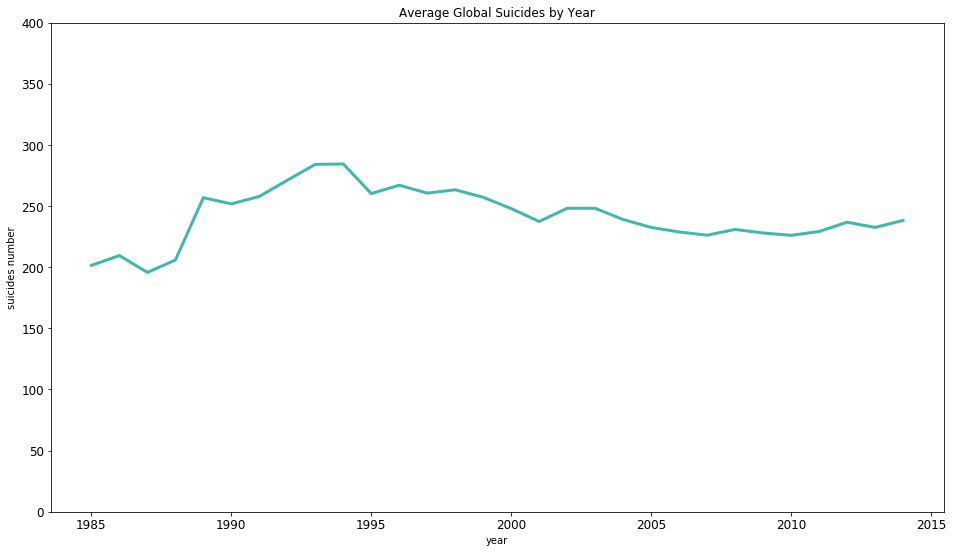

In [136]:
#average of suicides grouped by year
df.groupby('year').suicides_no.mean().sort_values(ascending=False).sort_index()[0:30].plot(figsize=(16,9),
                  color=['#40B8AF'], fontsize=12, linewidth=3)
plt.ylim(0, 400)
plt.ylabel('suicides number')
plt.title('Average Global Suicides by Year')

(0, 500)

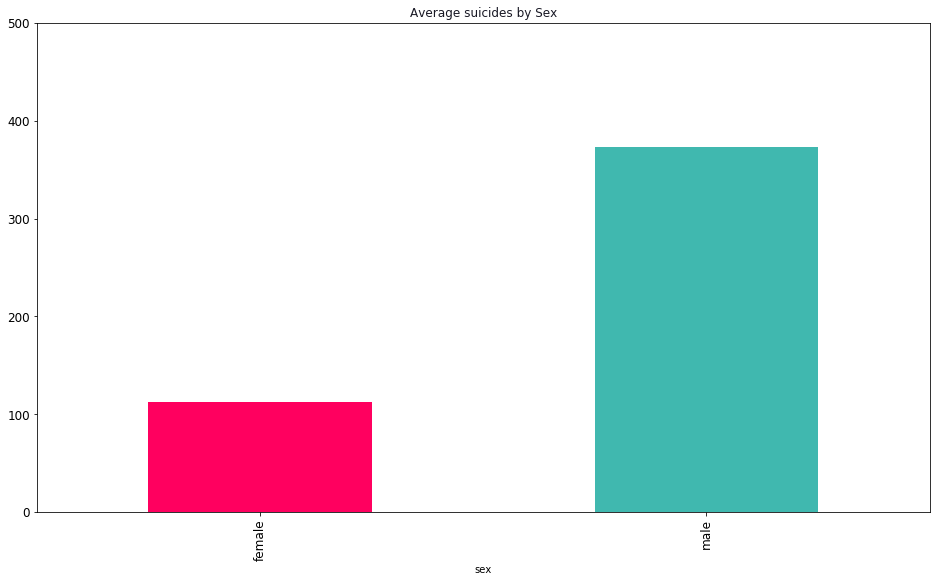

In [129]:
#Average suicides by Sex

suicide_bysex = df.groupby('sex').suicides_no.mean().plot(kind='bar', figsize=(16,9),
                  color=['#FF005F','#40B8AF'], fontsize=12)
plt.title('Average suicides by Sex', color='#191925')
plt.ylim(0,500)


In [221]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '